In [1]:
#Import dependencies 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df = pd.read_csv("D:\DS using python lab\insurance.csv") 
df1 = df

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Figure(1000x400)


<AxesSubplot:xlabel='age'>

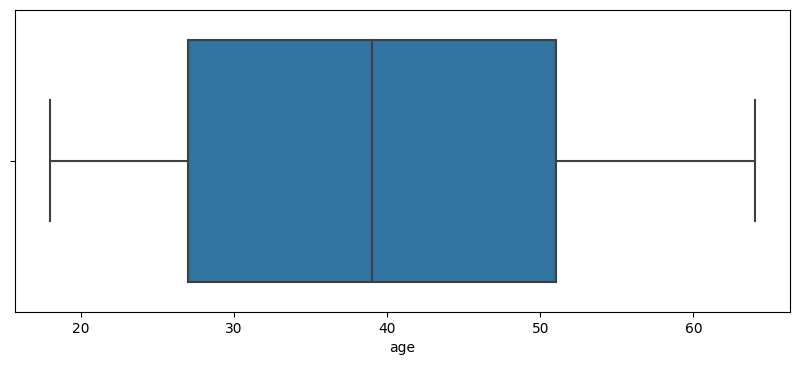

In [3]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "age", data = df1) 

Figure(1000x400)


<AxesSubplot:xlabel='bmi'>

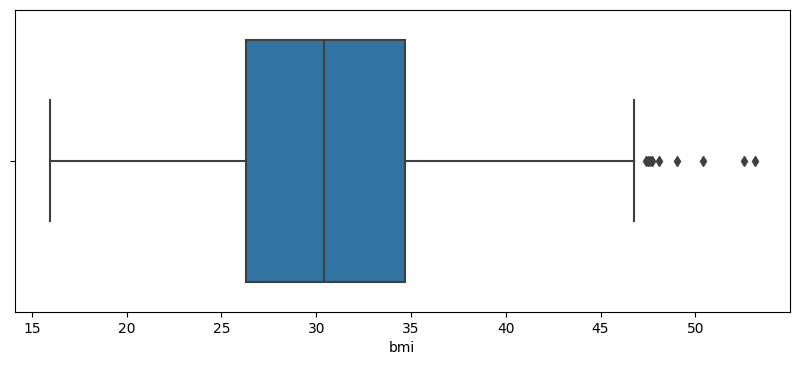

In [6]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "bmi", data = df1) 

In [31]:
# finding IQR
percentile25 = df1['bmi'].quantile(0.25)
percentile75 = df1['bmi'].quantile(0.75)
iqr = percentile75 - percentile25

In [32]:
# finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [33]:
# finding outliers using iqr
df1[df1['bmi'] > upper_limit]
df1[df1['bmi'] < lower_limit]

,age,sex,bmi,children,smoker,region,charges


In [34]:
# trimming outliers
new_df = df1[df1['bmi'] < upper_limit]
new_df.shape

(1329, 7)

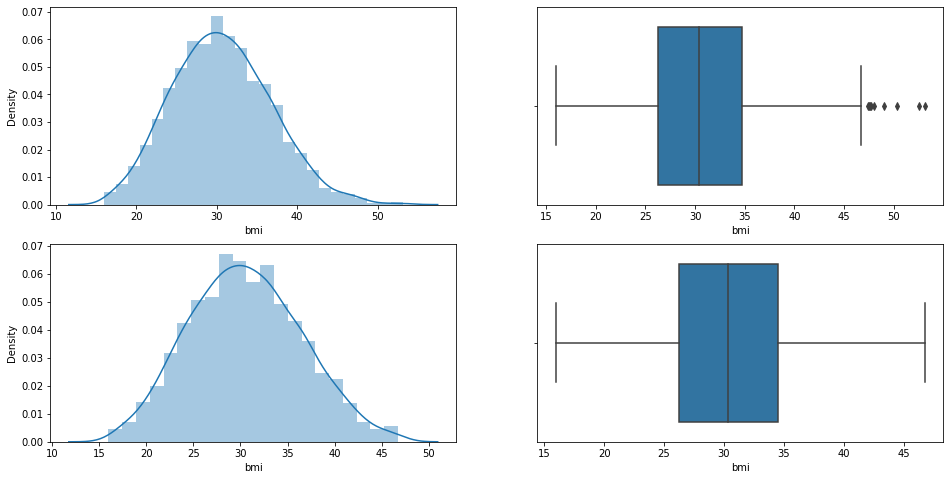

In [35]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['bmi'])
plt.subplot(2,2,2)
sns.boxplot(df1['bmi'])
plt.subplot(2,2,3)
sns.distplot(new_df['bmi'])
plt.subplot(2,2,4)
sns.boxplot(new_df['bmi'])
plt.show()

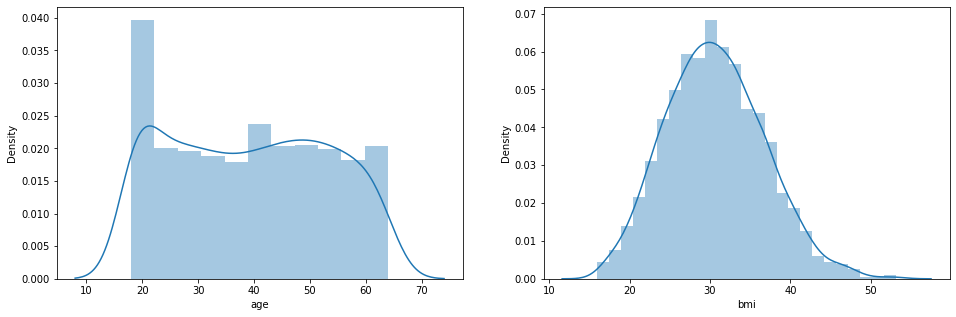

In [46]:
# plot distributions for features
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['age'])
plt.subplot(1,2,2)
sns.distplot(df1['bmi'])
plt.show()

In [47]:
# finding boundary values for bmi using z-score
print("Highest allowed",df1['bmi'].mean() + 3*df1['bmi'].std())
print("Lowest allowed",df1['bmi'].mean() - 3*df1['bmi'].std())

Highest allowed 48.95795759602359
Lowest allowed 12.368836125949507


In [43]:
# finding outliers for bmi
df1[(df1['bmi'] > 48.95) | (df1['bmi'] < 12.368)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [48]:
# Trimming of outliers for bmi
new_df1 = df1[(df1['bmi'] < 48.95) & (df1['bmi'] > 12.368)]
new_df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


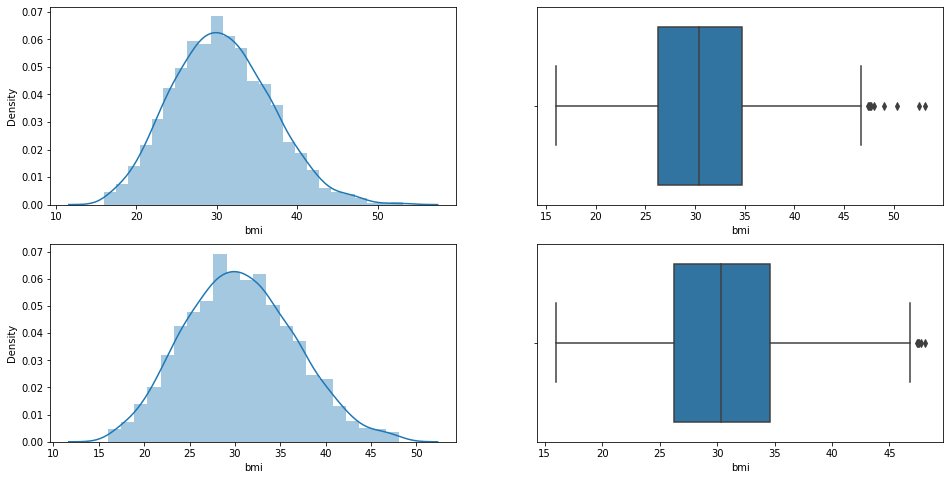

In [49]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['bmi'])
plt.subplot(2,2,2)
sns.boxplot(df1['bmi'])
plt.subplot(2,2,3)
sns.distplot(new_df1['bmi'])
plt.subplot(2,2,4)
sns.boxplot(new_df1['bmi'])
plt.show()